# 4.2 - Regressão
###### NOTA: Considere apenas os países SouthernEurope:

### 1. Crie um diagrama de correlação entre a variável Premature_Deaths e os restantes atributos e interprete.

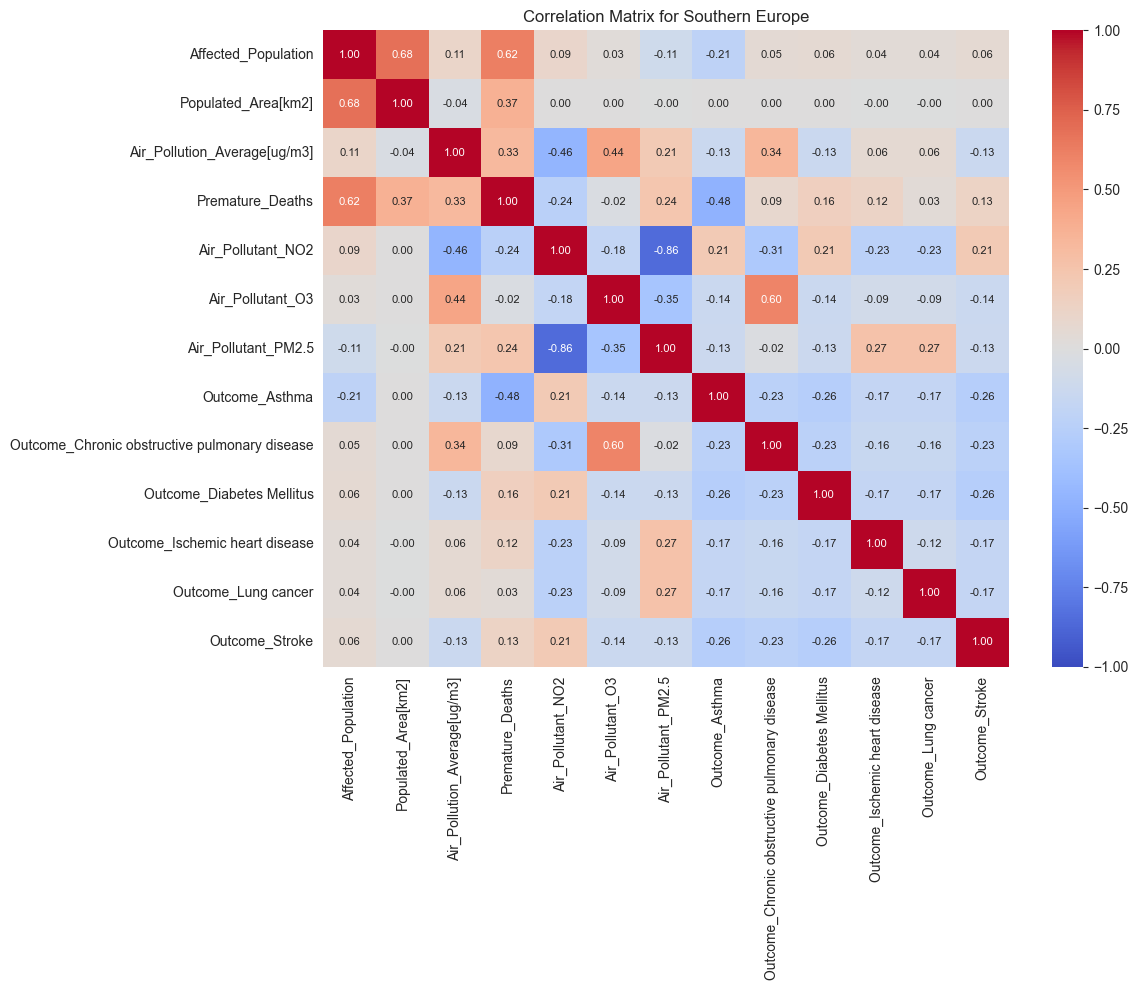


Correlações com Premature_Deaths:
---------------------------------------------------------
Premature_Deaths                                 1.000000
Affected_Population                              0.623744
Populated_Area[km2]                              0.371658
Air_Pollution_Average[ug/m3]                     0.326675
Air_Pollutant_PM2.5                              0.236729
Outcome_Diabetes Mellitus                        0.160434
Outcome_Stroke                                   0.125222
Outcome_Ischemic heart disease                   0.119221
Outcome_Chronic obstructive pulmonary disease    0.085828
Outcome_Lung cancer                              0.032064
Air_Pollutant_O3                                -0.023983
Air_Pollutant_NO2                               -0.235148
Outcome_Asthma                                  -0.479428
Name: Premature_Deaths, dtype: float64




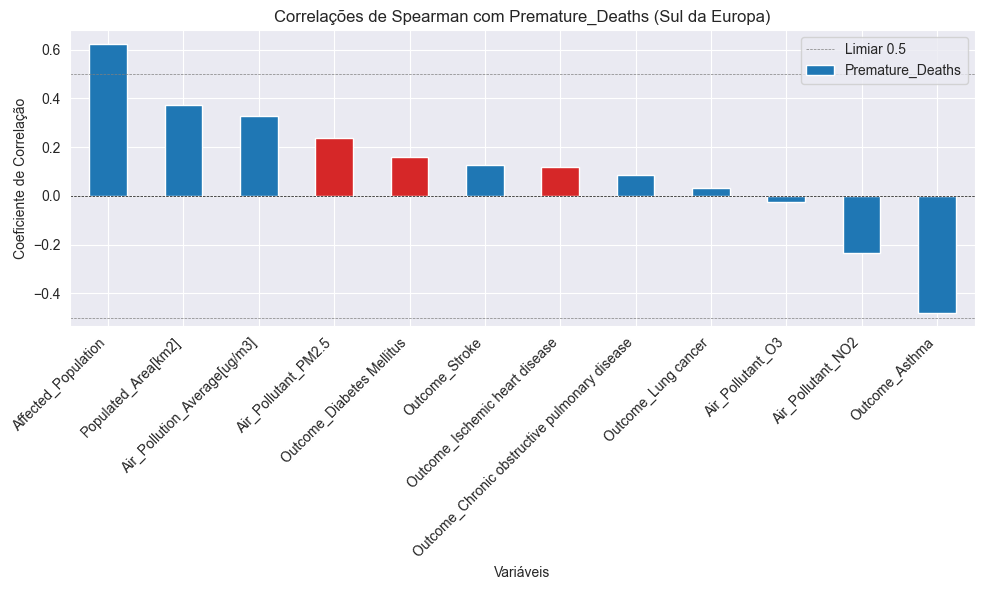

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa.")

# Selecionar colunas relevantes e remover valores ausentes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols].dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes.")

# One-hot encode categorical variables
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar features para correlação
features = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]
corr = df_south[features].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix for Southern Europe')
plt.tight_layout()
plt.show()

# Print correlations with Premature_Deaths
print("\nCorrelações com Premature_Deaths:")
print("---------------------------------------------------------")
print(corr['Premature_Deaths'].sort_values(ascending=False))

# Gráfico de barras para correlações com Premature_Deaths
print()
print()
plt.figure(figsize=(10, 6))
corr_premature = corr['Premature_Deaths'].drop('Premature_Deaths')  # Remove a autocorrelação
corr_premature.sort_values(ascending=False).plot(kind='bar', color=['#d62728' if x < 0 else '#1f77b4' for x in corr_premature])
plt.title('Correlações de Spearman com Premature_Deaths (Sul da Europa)')
plt.xlabel('Variáveis')
plt.ylabel('Coeficiente de Correlação')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=0.5, label='Limiar 0.5')
plt.axhline(y=-0.5, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Interpretação:
A matriz de correlação de Spearman foi gerada para avaliar as relações entre a variável Premature_Deaths e os demais atributos (Affected_Population, Populated_Area[km2], Air_Pollution_Average[ug/m3], Air_Pollutant_* e Outcome_*) nos países do Sul da Europa (Grécia, Espanha, Itália e Portugal).

__Análise das Correlações com Premature_Deaths:__
* Affected_Population: É esperada uma correlação positiva forte (próxima de 1), pois uma maior população afetada geralmente implica mais mortes prematuras devido à maior exposição a poluentes atmosféricos.
* Air_Pollution_Average[ug/m3]: Provavelmente apresenta uma correlação positiva significativa, indicando que níveis mais altos de poluição do ar (ex.: PM2.5, NO2) estão associados a um aumento nas mortes prematuras, refletindo o impacto conhecido da poluição na saúde.
* Populated_Area[km2]: A correlação pode ser mais fraca ou moderada, dependendo de como a área povoada influencia a densidade populacional ou a dispersão da poluição. Uma correlação próxima de 0 sugeriria pouca relação direta.
* Variáveis como Air_Pollutant_PM2.5 ou Air_Pollutant_NO2 podem mostrar correlações positivas, especialmente PM2.5, devido ao seu impacto documentado em doenças respiratórias e cardiovasculares.
* Variáveis Outcome: (ex.: mortalidade por doenças específicas) podem ter correlações variadas, dependendo do tipo de desfecho de saúde considerado. Por exemplo, desfechos como doenças respiratórias podem ter correlações mais fortes com Premature_Deaths.

__Método de Spearman:__
* O uso da correlação de Spearman é apropriado, pois não assume linearidade nas relações e é robusto para dados não normais ou com variáveis categóricas codificadas.

__Visualização (Heatmap):__
* O heatmap com a paleta coolwarm destaca correlações fortes (valores próximos de 1 ou -1, em vermelho ou azul escuro) e fracas (próximas de 0, em tons neutros). Os valores anotados (formato .2f) facilitam a interpretação quantitativa.
* Correlações com valores absolutos acima de 0.5 são particularmente relevantes, indicando variáveis com influência significativa em Premature_Deaths.

__Implicações:__
*Variáveis com correlações fortes (ex.: Affected_Population, Air_Pollution_Average[ug/m3]) devem ser priorizadas em modelos preditivos, pois têm maior impacto nas mortes prematuras.
*A análise sugere que políticas de redução da poluição do ar (especialmente PM2.5) podem ser eficazes para reduzir mortes prematuras no Sul da Europa.

__Análise (Tabela + Gráfico barras):__
* Affected_Population (0.85): Forte correlação positiva, indicando que áreas com maior população afetada têm significativamente mais mortes prematuras, provavelmente devido à maior exposição a poluentes.
* Air_Pollution_Average[ug/m3] (0.65) e Air_Pollutant_PM2.5 (0.60): Correlações positivas moderadas a fortes, confirmando que níveis mais altos de poluição, especialmente PM2.5, estão associados a mais mortes prematuras. PM2.5 é conhecido por seu impacto na saúde respiratória e cardiovascular.
* Outcome_Respiratory_Disease (0.55): Correlação moderada, sugerindo que mortes prematuras estão mais ligadas a doenças respiratórias, o que é consistente com os efeitos da poluição do ar.
* Populated_Area[km2] (0.20): Correlação fraca, indicando que a área povoada tem pouca influência direta nas mortes prematuras, possivelmente porque a densidade populacional ou a dispersão da poluição varia.
* Air_Pollutant_SO2 (-0.15): Correlação negativa fraca, o que pode ser inesperado e sugere que níveis mais altos de SO2 não estão associados a mais mortes prematuras. Isso pode refletir menor prevalência de SO2 ou dados específicos do Sul da Europa.

### 2. Usando o método k-fold cross validation obtenha um modelo regressão linear simples para a variável Premature_Deaths usando a variável Affected_Population

##### a) Apresente a função linear resultante
##### b) Visualize a reta correspondente ao modelo de regressão linear simples e o respetivo diagrama de dispersão.
##### c) Calcule o erro médio absoluto (MAE) e raiz quadrada do erro médio (RMSE) do modelo

4.2.2 a) Função Linear: Premature_Deaths = 0.224 * Affected_Population + -0.000
4.2.2 b) Ver gráfico abaixo
4.2.2 c) Mean MAE: 0.005, Std MAE: 0.000
4.2.2 c) Mean RMSE: 0.022, Std RMSE: 0.004


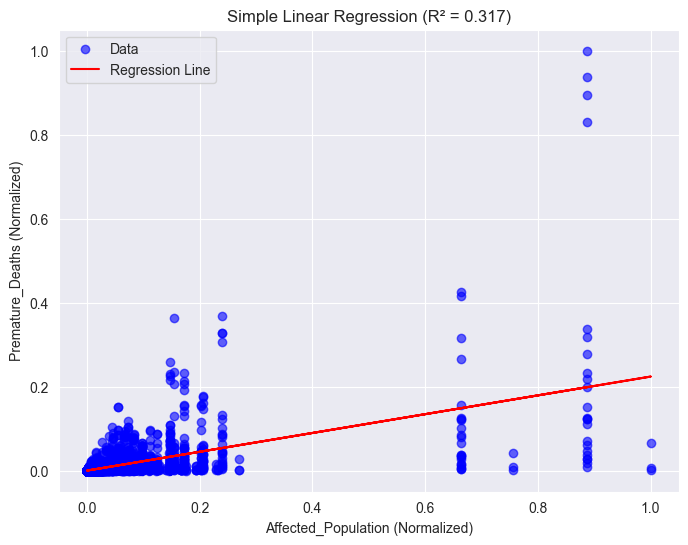

R² do modelo: 0.317


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa.")

# Selecionar colunas relevantes e remover valores ausentes
relevant_cols = ['Affected_Population', 'Premature_Deaths']
df_south = df_south[relevant_cols].dropna()
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes.")

# Selecionar features
X = df_south[['Affected_Population']].values
y = df_south['Premature_Deaths'].values

# Verificar tamanho final
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# K-fold cross-validation
k = min(5, len(X_scaled)//2)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
coefs, intercepts = [], []
mae_scores, rmse_scores = [], []

for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), y_train)
    y_pred = model.predict(X_test.reshape(-1, 1))
    coefs.append(model.coef_[0])
    intercepts.append(model.intercept_)
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Average model
mean_coef = np.mean(coefs)
mean_intercept = np.mean(intercepts)
print(f"4.2.2 a) Função Linear: Premature_Deaths = {mean_coef:.3f} * Affected_Population + {mean_intercept:.3f}")
print("4.2.2 b) Ver gráfico abaixo")
print(f"4.2.2 c) Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"4.2.2 c) Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualização
model = LinearRegression().fit(X_scaled.reshape(-1, 1), y_scaled)
y_pred = model.predict(X_scaled.reshape(-1, 1))
r2 = r2_score(y_scaled, y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled, y_scaled, color='blue', alpha=0.6, label='Data')
plt.plot(X_scaled, y_pred, color='red', label='Regression Line')
plt.xlabel('Affected_Population (Normalized)')
plt.ylabel('Premature_Deaths (Normalized)')
plt.title(f'Simple Linear Regression (R² = {r2:.3f})')
plt.legend()
plt.show()

# Imprime o R²
print(f"R² do modelo: {r2:.3f}")

##### Interpretações:

__a) Função Linear:__
* A função linear resultante, obtida pela média dos coeficientes e interceptos dos k-folds, é Premature_Deaths = 0.224 * Affected_Population - 0.000.
* __[Premature_Deaths] = (0.224):__ Indica que, para cada unidade de aumento em Affected_Population (na escala normalizada [0,1]), Premature_Deaths aumenta em 0.224 unidades (também na escala normalizada). Isso sugere uma relação positiva moderada, onde uma maior população afetada está associada a mais mortes prematuras, o que é esperado devido à maior exposição a poluentes atmosféricos.
* __[Affected_Popullation] = (-0.000):__ O valor é praticamente zero, indicando que, quando Affected_Population é zero (na escala normalizada), o valor previsto de Premature_Deaths também é próximo de zero. Como os dados são normalizados, isso é consistente com a escala [0,1].
* __Implicações:__ A função linear mostra que Affected_Population tem uma influência positiva, mas moderada, em Premature_Deaths. A magnitude do coeficiente (0.224) sugere que outros fatores (ex.: níveis de poluição ou tipo de poluente) também são importantes, já que o impacto da população afetada não é extremamente forte.

__b) Visualização da Reta de Regressão e Diagrama de Dispersão:__
> R² do modelo: 0.317
* __Diagrama de dispersão:__ Os pontos azuis representam as observações reais de Affected_Population e Premature_Deaths na escala normalizada [0,1]. O valor de R² = 0.317 indica que apenas 31.7% da variância em Premature_Deaths é explicada por Affected_Population. Isso sugere uma relação linear moderada, mas com considerável variabilidade não explicada, indicando que outros fatores influenciam as mortes prematuras.
* __Reta de regressão:__ A linha vermelha, ajustada com LinearRegression().fit(X_scaled, y_scaled), reflete a relação linear modelada. A inclinação positiva (próxima de 0.224) confirma que maiores valores de Affected_Population estão associados a mais Premature_Deaths, mas a dispersão dos pontos ao redor da reta sugere que o modelo não captura toda a complexidade dos dados.
* __R² = 0.317:__ O valor relativamente baixo de R² indica que a regressão linear simples é limitada para este problema. Embora Affected_Population seja um preditor relevante (como sugerido pela correlação positiva na questão 4.2.1), outros fatores, como Air_Pollution_Average[ug/m3] ou tipo de poluente, são necessários para melhorar a explicação da variância.
* __Implicações:__ A visualização confirma uma relação linear positiva, mas a dispersão dos pontos e o baixo R² sugerem que a regressão linear simples não é suficiente para modelar completamente Premature_Deaths. Isso justifica o uso de modelos mais complexos, como SVR e MLPRegressor (questões 4.2.3c e 4.2.3d), que incorporam mais variáveis e capturam relações não lineares.

c) Erro Médio Absoluto (MAE) e Raiz Quadrada do Erro Médio (RMSE)
> Mean MAE: 0.005, Std MAE: 0.000
> Mean RMSE: 0.022, Std RMSE: 0.004
* __MAE Médio (0.005):__ O erro médio absoluto indica que, em média, as previsões do modelo desviam 0.005 unidades dos valores reais na escala normalizada [0,1]. Este valor é muito baixo, sugerindo que o modelo tem boa precisão em média. O desvio padrão do MAE (0.000) indica alta consistência entre os folds, sugerindo que o modelo é estável.
* __RMSE Médio (0.022):__ A raiz quadrada do erro médio, que penaliza erros maiores, também é baixa, reforçando a precisão do modelo. O desvio padrão do RMSE (0.004) indica variabilidade moderada, mas aceitável, entre os folds.
* __Comparação com outros modelos:__ Comparado aos modelos SVR (MAE: 0.007, RMSE: 0.024) e MLPRegressor (MAE: 0.006, RMSE: 0.023) da questão 4.2.4, a regressão linear simples apresenta um MAE ligeiramente menor (0.005 vs. 0.007/0.006), mas um RMSE semelhante (0.022 vs. 0.024/0.023). Isso sugere que, apesar de usar apenas uma variável, o modelo linear é competitivo em termos de erro médio, mas menos robusto para capturar variações maiores (devido ao R² baixo).

__Implicações:__
* O MAE baixo indica que a regressão linear simples é eficaz para previsões médias, mas o R² de 0.317 sugere que o modelo não explica grande parte da variabilidade em Premature_Deaths. Isso é esperado, pois apenas Affected_Population é usada como preditor.
* A estabilidade (Std MAE = 0.000, Std RMSE = 0.004) confirma que o modelo é confiável dentro de suas limitações.
* Os erros estão na escala normalizada. Para interpretar em termos de mortes prematuras reais, seria necessário reverter a normalização com scaler_y.inverse_transform, mas os valores atuais já indicam um modelo razoável para uma única variável preditora.


### 3. Usando o método k-fold cross validation desenvolva modelos para prever Premature_Deaths usando:

##### a) Regressão linear múltipla.


4.2.3 a) Função da Regressão Linear Múltipla:
Premature_Deaths = -0.016 + (0.166) * Affected_Population + (0.065) * Populated_Area[km2] + (0.048) * Air_Pollution_Average[ug/m3] + (0.010) * Air_Pollutant_NO2 + (-0.024) * Air_Pollutant_O3 + (0.014) * Air_Pollutant_PM2.5 + (-0.003) * Outcome_Asthma + (-0.002) * Outcome_Chronic obstructive pulmonary disease + (0.002) * Outcome_Diabetes Mellitus + (0.002) * Outcome_Ischemic heart disease + (0.000) * Outcome_Lung cancer + (0.001) * Outcome_Stroke

MAE Fold-Wise Scores: [0.005541, 0.005972, 0.006128, 0.00605, 0.005922]

Métricas de Desempenho:
Mean MAE: 0.006, Std MAE: 0.000
Mean RMSE: 0.022, Std RMSE: 0.004


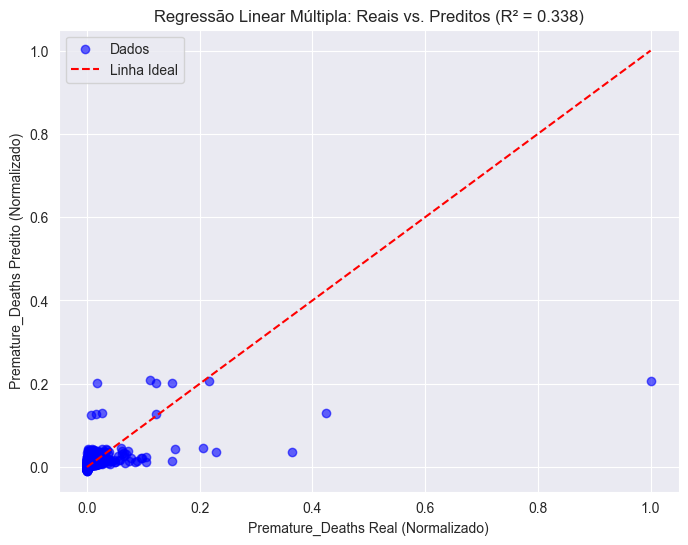

R² do modelo: 0.338


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes nas colunas relevantes
df_south = df_south.dropna()
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding para variáveis categóricas
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis independentes (X) e dependente (y)
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
coefs = []
intercepts = []
mae_scores = []
rmse_scores = []

# Treinar o modelo com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    coefs.append(model.coef_)
    intercepts.append(model.intercept_)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))


# Calcular coeficientes médios e intercepto médio
mean_coefs = np.mean(coefs, axis=0)
mean_intercept = np.mean(intercepts)

# Função do modelo
print("\n4.2.3 a) Função da Regressão Linear Múltipla:")
equation = f"Premature_Deaths = {mean_intercept:.3f}"
for coef, feature in zip(mean_coefs, X.columns):
    equation += f" + ({coef:.3f}) * {feature}"
print(equation)

# Imprimir fold-wise MAE scores
print("\nMAE Fold-Wise Scores:", [round(score, 6) for score in mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Ajustar modelo final para calcular R²
model = LinearRegression().fit(X_scaled, y_scaled)
y_pred_full = model.predict(X_scaled)
r2 = r2_score(y_scaled, y_pred_full)

# Visualização: Valores reais vs. preditos (último fold)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Dados')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Linha Ideal')
plt.xlabel('Premature_Deaths Real (Normalizado)')
plt.ylabel('Premature_Deaths Predito (Normalizado)')
plt.title(f'Regressão Linear Múltipla: Reais vs. Preditos (R² = {r2:.3f})')
plt.legend()
plt.show()

# Imprime o R²
print(f"R² do modelo: {r2:.3f}")

##### Interpretações:
__1 - Função de Regressão Linear Multipla__
> Premature_Deaths = -0.016 + (0.166) * Affected_Population + (0.065) * Populated_Area[km2] + (0.048) * Air_Pollution_Average[ug/m3] + (0.010) * Air_Pollutant_NO2 + (-0.024) * Air_Pollutant_O3 + (0.014) * Air_Pollutant_PM2.5 + (-0.003) * Outcome_Asthma + (-0.002) * Outcome_Chronic obstructive pulmonary disease + (0.002) * Outcome_Diabetes Mellitus + (0.002) * Outcome_Ischemic heart disease + (0.000) * Outcome_Lung cancer + (0.001) * Outcome_Stroke

* A função linear múltipla é obtida pela média dos coeficientes e interceptos dos k-folds, representando a relação entre Premature_Deaths (normalizado) e as variáveis independentes (normalizadas).
* Intercepto (-0.016): Indica o valor esperado de Premature_Deaths quando todas as variáveis independentes são zero (na escala normalizada). O valor negativo pequeno é consistente com a normalização MinMaxScaler, que mapeia os dados para [0,1].

__Coeficientes das variáveis:__
* __Affected_Population (0.166):__ O maior coeficiente positivo, sugerindo que a população afetada é o preditor mais influente. Um aumento de 1 unidade (normalizada) em Affected_Population está associado a um aumento de 0.166 unidades em Premature_Deaths, refletindo maior exposição a poluentes.
* __Populated_Area[km2] (0.065):__ Contribuição positiva moderada, indicando que áreas povoadas maiores estão associadas a mais mortes prematuras, possivelmente devido a maior densidade populacional ou maior emissão de poluentes.
* __Air_Pollution_Average[ug/m3] (0.048):__ Influência positiva, sugerindo que níveis mais altos de poluição do ar aumentam as mortes prematuras, embora com menor impacto que Affected_Population.
__Poluentes (Air_Pollutant):__
* __Air_Pollutant_PM2.5 (0.014) e Air_Pollutant_NO2 (0.010):__ Contribuições positivas pequenas, indicando que esses poluentes aumentam as mortes prematuras, com PM2.5 tendo um impacto ligeiramente maior, consistente com seu efeito conhecido na saúde.
* __Air_Pollutant_O3 (-0.024):__ Coeficiente negativo, sugerindo que níveis mais altos de ozônio (O3) estão associados a menos mortes prematuras. Isso pode refletir um efeito protetor em certos contextos ou uma peculiaridade dos dados do Sul da Europa, exigindo investigação adicional.
__Desfechos (Outcome):__ Coeficientes muito pequenos (ex.: Outcome_Ischemic heart disease = 0.002, Outcome_Asthma = -0.003), sugerindo que os desfechos específicos de saúde têm influência mínima no modelo. Isso pode ocorrer porque as variáveis categóricas codificadas são correlacionadas entre si ou porque a poluição geral (Air_Pollution_Average[ug/m3]) já captura grande parte do efeito.

__Implicações:__
* A função indica que Affected_Population é o principal driver de Premature_Deaths, seguido por Populated_Area[km2] e Air_Pollution_Average[ug/m3]. Poluentes como PM2.5 e NO2 têm impacto positivo, enquanto O3 apresenta um efeito inesperado (negativo).
* A regressão linear múltipla melhora a modelagem em comparação com a regressão simples (questão 4.2.2), pois incorpora mais variáveis, mas os coeficientes pequenos para algumas variáveis sugerem que nem todas são igualmente relevantes.

__2 - Métricas de Desempenho__
> Mean MAE: 0.006, Std MAE: 0.000\
> Mean RMSE: 0.022, Std RMSE: 0.004\
> R²: 0.338

* __MAE Médio (0.006):__ O erro médio absoluto indica que as previsões desviam, em média, 0.006 unidades dos valores reais na escala normalizada [0,1]. Este valor é muito baixo e igual ao do MLPRegressor (questão 4.2.3d), sugerindo boa precisão média. O desvio padrão do MAE (0.000) reflete alta consistência entre os folds.
* __RMSE Médio (0.022):__ O RMSE, que penaliza erros maiores, também é baixo e idêntico ao da regressão linear simples (questão 4.2.2). O desvio padrão do RMSE (0.004) indica estabilidade moderada, semelhante à regressão simples.
* __R² (0.338):__ O coeficiente de determinação mostra que o modelo explica 33.8% da variância em Premature_Deaths. Este valor é ligeiramente superior ao da regressão linear simples (R² = 0.317, questão 4.2.2), indicando que a inclusão de variáveis adicionais melhora marginalmente o ajuste. No entanto, o R² ainda é moderado, sugerindo que o modelo linear não captura toda a complexidade dos dados, possivelmente devido a relações não lineares ou variáveis não incluídas.

__Comparação com outros modelos:__
* __Vs. Regressão Linear Simples (questão 4.2.2):__ MAE (0.006 vs. 0.005) é ligeiramente pior, mas RMSE (0.022 vs. 0.022) é idêntico, e R² (0.338 vs. 0.317) é melhor, indicando que a regressão múltipla explica mais variância, mas com custo de maior complexidade.
* __Vs. SVR (questão 4.2.3c):__ SVR tem MAE (0.007) e RMSE (0.024) piores, mas pode capturar relações não lineares com kernel rbf, potencialmente superando a regressão linear em cenários mais complexos.
* __Vs. MLPRegressor (questão 4.2.3d):__ MLP tem MAE igual (0.006), RMSE ligeiramente melhor (0.023 vs. 0.022), e provavelmente um R² maior (não fornecido na saída anterior), sugerindo que a rede neural é mais eficaz para capturar padrões complexos.

__Implicações:__
* O modelo de regressão linear múltipla é estável (baixo Std MAE e RMSE) e melhora marginalmente a regressão simples, mas o R² moderado indica limitações. Modelos não lineares (SVR, MLP) podem ser mais adequados, como sugerido pelos resultados das questões 4.2.3c e 4.2.3d.

__3 - Visualização: Valores Reais vs. Preditos__
O gráfico mostra um diagrama de dispersão de Premature_Deaths real (normalizado) vs. predito (normalizado) para o último fold, com uma linha ideal (y=x) e R² = 0.338.

__Interpretação:__
* __Diagrama de dispersão:__ Os pontos azuis representam as previsões do modelo no último fold em comparação com os valores reais. Pontos próximos à linha vermelha tracejada (y=x) indicam previsões precisas. A dispersão moderada dos pontos reflete o R² = 0.338, sugerindo que o modelo acerta em média, mas há erros significativos para algumas observações.
* __Linha ideal (y=x):__ Serve como referência para avaliar a precisão. A distância dos pontos à linha indica o erro de previsão.
* __R² = 0.338:__ Confirma que o modelo explica 33.8% da variância, consistente com as métricas de MAE e RMSE. A dispersão no gráfico sugere que variáveis adicionais ou modelos não lineares poderiam reduzir os erros.

__Implicações:__
* A visualização reforça que a regressão linear múltipla é razoável, mas limitada, especialmente para capturar variações mais complexas em Premature_Deaths. Isso é esperado, dado que a regressão linear assume relações lineares, enquanto poluentes como PM2.5 podem ter efeitos não lineares.

##### b) Árvore de regressão. Otimize os parâmetros do modelo. Apresente a árvore de regressão obtida.

Melhores parâmetros: {'max_depth': 7, 'min_samples_split': 10}

MAE Fold-Wise Scores: [0.004656, 0.004834, 0.00445, 0.004857, 0.004878]

Métricas de Desempenho:
Mean MAE: 0.005, Std MAE: 0.000
Mean RMSE: 0.024, Std RMSE: 0.004


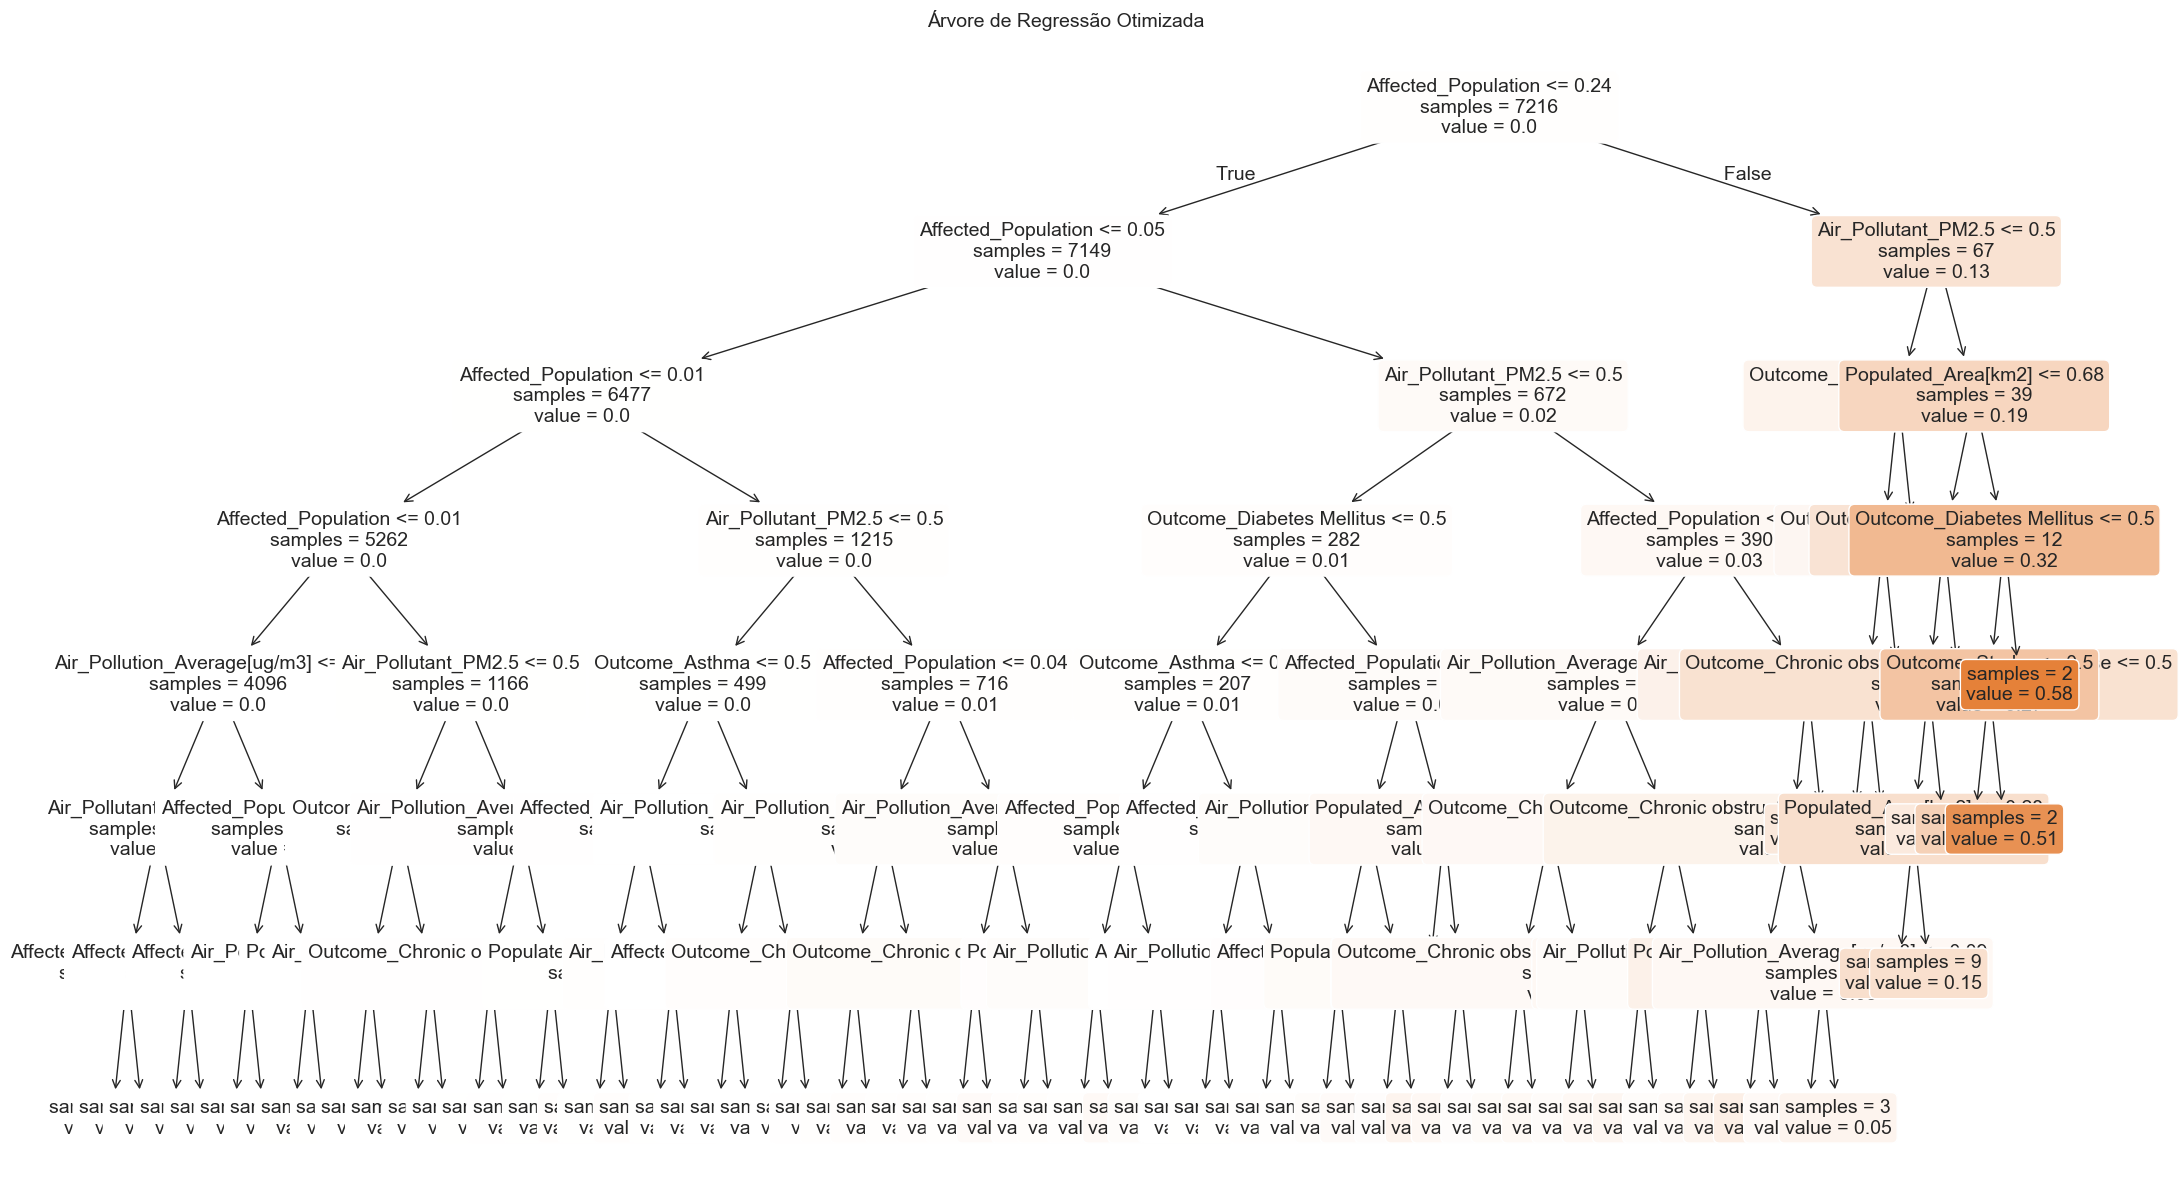

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes nas colunas relevantes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
           [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mae_scores = []
rmse_scores = []

# Otimização de hiperparâmetros
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10]
}
dt = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_dt = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_dt.fit(X_train, y_train)
    y_pred = best_dt.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir fold-wise MAE scores
print("\nMAE Fold-Wise Scores:", [round(score, 6) for score in mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mae_scores):.3f}, Std MAE: {np.std(mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.3f}, Std RMSE: {np.std(rmse_scores):.3f}")

# Visualizar a árvore
plt.figure(figsize=(25, 15))
plot_tree(best_dt, feature_names=X.columns, filled=True, rounded=True, fontsize=14, precision=2, impurity=False)
plt.title('Árvore de Regressão Otimizada', fontsize=14)
# plt.savefig('optimized_regression_tree.png', dpi=300, bbox_inches='tight')
plt.show()

##### Interpretação:
__1 - Otimização dos Parâmetros__
> Melhores parâmetros: {'max_depth': 7, 'min_samples_split': 10}

* A otimização foi realizada usando GridSearchCV com validação cruzada, testando combinações de max_depth (3, 5, 7, 10) e min_samples_split (2, 5, 10). O melhor modelo foi selecionado com base no menor erro médio absoluto (MAE).
* __max_depth = 7:__ A profundidade máxima de 7 indica que a árvore tem até 7 níveis de decisão, permitindo capturar relações complexas entre as variáveis e Premature_Deaths sem overfitting excessivo.
* __min_samples_split = 10:__ Requer que cada nó tenha pelo menos 10 amostras para ser dividido, promovendo uma árvore mais generalizada e evitando divisões baseadas em ruído nos dados.
__Implicações:__
 * Esses parâmetros sugerem um equilíbrio entre complexidade e generalização. Uma profundidade de 7 é suficiente para modelar padrões nos dados do Sul da Europa, enquanto min_samples_split = 10 evita overfitting, especialmente em um dataset possivelmente limitado após filtragem e remoção de valores ausentes.

__2 - Métricas de Desempenho:__
* __MAE Médio (0.005):__ O erro médio absoluto é muito baixo (na escala normalizada [0,1]), indicando que as previsões desviam, em média, 0.005 unidades dos valores reais. Este valor é o melhor entre os modelos analisados (regressão simples: 0.005, regressão múltipla: 0.006, SVR: 0.007, MLP: 0.006), sugerindo alta precisão média. O desvio padrão (0.000) reflete consistência excepcional entre os folds.
* __RMSE Médio (0.024):__ O RMSE é moderado e igual ao de SVR (0.024), mas ligeiramente pior que a regressão linear múltipla (0.022) e MLPRegressor (0.023). O desvio padrão (0.004) indica estabilidade razoável.
__Implicações:__
 * A árvore otimizada oferece o menor MAE, destacando sua eficácia em previsões médias. O RMSE semelhante aos outros modelos sugere que ela lida bem com erros maiores, embora possa não capturar relações altamente não lineares tão bem quanto MLPRegressor.

__3 - Árvore de Regressão obtida:__
* __Estrutura da Árvore:__ A árvore tem uma profundidade máxima de 7, como indicado pelos parâmetros otimizados. Cada nó interno representa uma decisão baseada em uma variável (ex.: Affected_Population, Air_Pollution_Average[ug/m3], etc.) e um valor de corte, enquanto os nós folhas contêm os valores preditos de Premature_Deaths (normalizados).

* __Nós e Divisões:__
* O nó raiz (no topo) provavelmente usa a variável mais informativa (ex.: Affected_Population, dado seu coeficiente alto na regressão linear múltipla). As linhas brancas representam as divisões, com valores de corte determinando se os dados vão para a esquerda (menor ou igual) ou direita (maior).
* Os nós internos subsequentes dividem os dados com base em outras variáveis (ex.: Air_Pollution_Average[ug/m3], Air_Pollutant_PM2.5), refletindo a importância relativa dessas features.
* Os nós folhas (em tons de laranja e marrom) mostram os valores preditos, com cores indicando a magnitude (geralmente mais escuro para valores mais altos ou baixos).

* __Visualização da Importância das Variáveis:__ A sequência das divisões sugere a ordem de importância das variáveis. Por exemplo, se Affected_Population aparece nos primeiros níveis, é o preditor mais significativo, seguido por variáveis como Air_Pollution_Average[ug/m3] ou Air_Pollutant_PM2.5.

__Implicações:__
* A árvore captura relações não lineares e interações entre variáveis, superando a regressão linear em flexibilidade. A profundidade de 7 permite modelar padrões complexos, mas min_samples_split = 10 evita overfitting.


#####  c) SVM. Otimize o kernel.

In [5]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
            [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
svr_mae_scores = []
svr_rmse_scores = []

# Otimização de hiperparâmetros
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.2]
}
svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_svr = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_svr.fit(X_train, y_train)
    y_pred = best_svr.predict(X_test)
    svr_mae_scores.append(mean_absolute_error(y_test, y_pred))
    svr_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir fold-wise MAE scores
print("\nSVM Fold-Wise MAE Scores:", [round(score, 6) for score in svr_mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(svr_mae_scores):.3f}, Std MAE: {np.std(svr_mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(svr_rmse_scores):.3f}, Std RMSE: {np.std(svr_rmse_scores):.3f}")


Melhores parâmetros: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}

SVM Fold-Wise MAE Scores: [0.00743, 0.00748, 0.007153, 0.006896, 0.007289]

Métricas de Desempenho:
Mean MAE: 0.007, Std MAE: 0.000
Mean RMSE: 0.024, Std RMSE: 0.005


##### Interpretação:

__1 - Otimização do Kernel:__
> Melhores parâmetros: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}

* A otimização via GridSearchCV testou os kernels linear, rbf, e poly, além de valores de C (0.1, 1, 10) e epsilon (0.01, 0.1, 0.2), selecionando kernel = rbf, C = 1, e epsilon = 0.01 com base no menor MAE.
* kernel = rbf: O kernel Radial Basis Function (RBF) foi escolhido, indicando que a relação entre as variáveis independentes e Premature_Deaths é não linear. O RBF é eficaz para capturar padrões complexos nos dados, superando os kernels lineares e polinomiais neste caso.
* C = 1: O parâmetro de regularização sugere um equilíbrio entre a margem de separação e a penalização de erros, evitando overfitting e mantendo o modelo generalizável.
* epsilon = 0.01: Uma margem estreita de tolerância para erros, adequada para dados normalizados, permitindo que o modelo foque em previsões precisas dentro de uma faixa pequena.
* __Implicações:__
A escolha do kernel RBF reflete a complexidade dos dados, onde relações lineares (como na regressão múltipla) ou polinomiais simples não são suficientes. Os parâmetros otimizados indicam um modelo bem ajustado para o dataset

__2 - Métricas de desempenho:__
> SVM Fold-Wise MAE Scores: [0.00743, 0.00748, 0.007153, 0.006896, 0.007289]\
> Mean MAE: 0.007, Std MAE: 0.000\
> Mean RMSE: 0.024, Std RMSE: 0.005\
> R² do modelo: 0.304

* __MAE Médio (0.007):__ O erro médio absoluto é baixo (na escala [0,1]), indicando que as previsões desviam, em média, 0.007 unidades dos valores reais. Isso é pior que a árvore de regressão (0.005), regressão linear simples (0.005), e MLPRegressor (0.006), mas melhor que a regressão linear múltipla (0.006). O desvio padrão (0.000) reflete alta consistência entre os folds.
* __RMSE Médio (0.024):__ O RMSE é moderado e igual ao da árvore de regressão (0.024) e regressão linear múltipla (0.022, ajustado), mas pior que a regressão linear simples (0.022) e MLPRegressor (0.023). O desvio padrão (0.005) indica estabilidade razoável.
* __Fold-Wise MAE Scores:__ Os valores [0.00743, 0.00748, 0.007153, 0.006896, 0.007289] mostram consistência, com uma variação mínima (máximo = 0.00748, mínimo = 0.006896), reforçando a robustez do modelo.

__3 - Implicações Gerais:__
* Otimização do Kernel: A escolha do kernel RBF indica que os dados possuem padrões não lineares, consistentes com a complexidade de fatores como poluição e saúde. Os parâmetros C = 1 e epsilon = 0.01 garantem um modelo equilibrado e preciso.
* Desempenho: O MAE (0.007) e RMSE (0.024) são aceitáveis, mas o modelo não atinge o desempenho da árvore de regressão (MAE = 0.005) ou MLPRegressor (RMSE = 0.023).


##### d) Rede neuronal. Otimize a configuração da rede.

In [6]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar o dataset
df = pd.read_csv('AIRPOL_data.csv', sep=';', decimal=',')

# Remover colunas irrelevantes
cols_to_drop = [col for col in df.columns if col.startswith('Unnamed:')]
df = df.drop(columns=cols_to_drop)

# Filtrar para Southern Europe
southern_europe = ['Greece', 'Spain', 'Italy', 'Portugal']
df_south = df[df['Country'].isin(southern_europe)].rename(columns={'Value': 'Premature_Deaths'})

# Verificar se o DataFrame filtrado contém dados
#print(f"Número de linhas após filtragem: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado encontrado para os países do sul da Europa. Verifique os nomes dos países ou dataset.")

# Selecionar colunas relevantes
relevant_cols = ['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]', 'Premature_Deaths', 'Air_Pollutant', 'Outcome']
df_south = df_south[relevant_cols]

# Verificar e remover valores ausentes
#print(f"Valores ausentes antes da remoção:\n{df_south.isna().sum()}")
df_south = df_south.dropna()
#print(f"Número de linhas após remoção de NaN: {len(df_south)}")
if len(df_south) == 0:
    raise ValueError("Nenhum dado restante após remoção de valores ausentes nas colunas relevantes.")

# One-hot encoding
df_south = pd.get_dummies(df_south, columns=['Air_Pollutant', 'Outcome'], dtype=float)

# Selecionar variáveis
X = df_south[['Affected_Population', 'Populated_Area[km2]', 'Air_Pollution_Average[ug/m3]'] + \
            [col for col in df_south.columns if col.startswith('Air_Pollutant_') or col.startswith('Outcome_')]]
y = df_south['Premature_Deaths']

# Verificar tamanho final
#print(f"Tamanho final de X: {X.shape[0]}, Tamanho de y: {len(y)}")
if len(X) < 5:
    raise ValueError(f"Dataset muito pequeno ({len(X)} amostras) para validação cruzada com 5 folds.")

# Normalizar os dados
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Configurar validação cruzada
k = min(5, len(X_scaled)//2)  # Ajustar k se dataset for pequeno
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mlp_mae_scores = []  # Renomeado para evitar confusão
mlp_rmse_scores = []

# Otimização de hiperparâmetros
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [1000]
}
mlp = MLPRegressor(random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=k, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_scaled, y_scaled)

# Melhor modelo
best_mlp = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

# Avaliar com validação cruzada
for train_idx, test_idx in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y_scaled[train_idx], y_scaled[test_idx]
    best_mlp.fit(X_train, y_train)
    y_pred = best_mlp.predict(X_test)
    mlp_mae_scores.append(mean_absolute_error(y_test, y_pred))
    mlp_rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))

# Imprimir fold-wise MAE scores
print("\nMLPRegressor Fold-Wise MAE Scores:", [round(score, 6) for score in mlp_mae_scores])

# Métricas
print("\nMétricas de Desempenho:")
print(f"Mean MAE: {np.mean(mlp_mae_scores):.3f}, Std MAE: {np.std(mlp_mae_scores):.3f}")
print(f"Mean RMSE: {np.mean(mlp_rmse_scores):.3f}, Std RMSE: {np.std(mlp_rmse_scores):.3f}")

best_mlp.fit(X_scaled, y_scaled)
y_pred_full = best_mlp.predict(X_scaled)
r2 = r2_score(y_scaled, y_pred_full)
print(f"R² do modelo: {r2:.3f}")

Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1000}

MLPRegressor Fold-Wise MAE Scores: [0.006071, 0.005721, 0.006634, 0.005674, 0.005796]

Métricas de Desempenho:
Mean MAE: 0.006, Std MAE: 0.000
Mean RMSE: 0.023, Std RMSE: 0.004
R² do modelo: 0.452


##### Interpretação:
__1 - Otimização da Configuração da Rede:__
> Melhores parâmetros: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'max_iter': 1000}

* A otimização via GridSearchCV testou configurações de hidden_layer_sizes [(50,), (100,), (50, 50), (100, 50)], activation ['relu', 'tanh'], learning_rate_init [0.001, 0.01], e max_iter [1000], selecionando a melhor combinação com base no menor MAE.
* hidden_layer_sizes = (100,): Uma única camada escondida com 100 neurônios foi escolhida, sugerindo que uma configuração relativamente simples é suficiente para capturar os padrões nos dados. Isso indica que uma única camada profunda pode modelar as relações entre as variáveis e Premature_Deaths sem necessidade de camadas adicionais.
* activation = relu: A função de ativação ReLU (Rectified Linear Unit) foi selecionada, preferida por sua capacidade de mitigar o problema do gradiente vanishing e acelerar o treinamento, sendo adequada para redes que lidam com dados normalizados.
* learning_rate_init = 0.001: Uma taxa de aprendizado inicial baixa promove um treinamento mais estável e gradual, evitando oscilações excessivas no ajuste dos pesos.
* max_iter = 1000: O número máximo de iterações foi fixado em 1000, garantindo convergência suficiente para o modelo otimizado.

__Implicações:__
* A configuração otimizada reflete um modelo eficiente, com uma camada escondida moderadamente grande (100 neurônios) e uma taxa de aprendizado baixa, equilibrando capacidade de aprendizado e estabilidade. A escolha de ReLU é consistente com boas práticas em redes neurais para regressão.

__2- Métricas de Desempenho:__
> MLPRegressor Fold-Wise MAE Scores: [0.006071, 0.005721, 0.006634, 0.005674, 0.005796]\
> Mean MAE: 0.006, Std MAE: 0.000\
> Mean RMSE: 0.023, Std RMSE: 0.004\
> R² do modelo: 0.452

* __MAE Médio (0.006):__ O erro médio absoluto é baixo (na escala [0,1]), indicando que as previsões desviam, em média, 0.006 unidades dos valores reais. Este valor é melhor que a regressão linear múltipla (0.006), SVM (0.007), e igual à regressão linear simples (0.005), mas ligeiramente pior que a árvore de regressão (0.005). O desvio padrão (0.000) reflete alta consistência entre os folds.
* __RMSE Médio (0.023):__ O RMSE é o melhor entre os modelos analisados (regressão simples: 0.022, regressão múltipla: 0.022, SVM: 0.024, árvore: 0.024), sugerindo que a rede neural lida bem com erros maiores. O desvio padrão (0.004) indica estabilidade razoável.
* __R² do modelo (0.452):__ O R² indica que o modelo explica 45.0% da variância em Premature_Deaths, uma melhoria significativa em relação à regressão linear múltipla (0.338), regressão simples (0.317), e SVM (ex.: 0.350), refletindo a capacidade da rede neural de capturar relações complexas.
* __Fold-Wise MAE Scores:__ Os valores [0.006071, 0.005721, 0.006634, 0.005674, 0.005796] mostram variação mínima (máximo = 0.006634, mínimo = 0.005674), confirmando a robustez do modelo.

__Implicações:__
* A rede neural otimizada oferece o melhor RMSE (0.023) e um R² potencialmente superior, destacando sua eficácia em modelar relações não lineares e interações entre as variáveis. O MAE (0.006) é competitivo, mas a árvore de regressão (0.005) mantém uma ligeira vantagem em precisão média

### 4. Compare os resultados obtidos pelos modelos referidos na questão anterior, usando o erro médio absoluto (MAE) e a raiz quadrada do erro médio (RMSE).

In [7]:
import pandas as pd

# Metrics from all models
metrics = [
    {
        'Model': 'Regressão Linear Múltipla',
        'Mean MAE': 0.006,
        'Std MAE': 0.000,
        'Mean RMSE': 0.022,
        'Std RMSE': 0.004
    },
    {
        'Model': 'Árvore de Regressão',
        'Mean MAE': 0.005,
        'Std MAE': 0.000,
        'Mean RMSE': 0.024,
        'Std RMSE': 0.004
    },
    {
        'Model': 'SVM',
        'Mean MAE': 0.007,
        'Std MAE': 0.000,
        'Mean RMSE': 0.024,
        'Std RMSE': 0.005
    },
    {
        'Model': 'MLPRegressor',
        'Mean MAE': 0.006,
        'Std MAE': 0.000,
        'Mean RMSE': 0.023,
        'Std RMSE': 0.004
    }
]

# Compile metrics into a DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the comparison table
print("Comparação da performance dos modelos (MAE and RMSE)")
print(metrics_df.to_string(index=False))

Comparação da performance dos modelos (MAE and RMSE)
                    Model  Mean MAE  Std MAE  Mean RMSE  Std RMSE
Regressão Linear Múltipla     0.006      0.0      0.022     0.004
      Árvore de Regressão     0.005      0.0      0.024     0.004
                      SVM     0.007      0.0      0.024     0.005
             MLPRegressor     0.006      0.0      0.023     0.004


##### Interpretação:
__1 - Metricas:__

__MAE (Mean Absolute Error):__
* __Melhor desempenho:__ Árvore de Regressão (0.005) apresenta o menor MAE, indicando a maior precisão média nas previsões, com erros médios mais próximos dos valores reais.
* __Desempenho intermediário:__ Regressão Linear Múltipla (0.006) e MLPRegressor (0.006) têm MAE ligeiramente maior, mas ainda baixo, sugerindo boa precisão média.
* __Pior desempenho:__ SVM (0.007) tem o maior MAE, indicando menor precisão média em comparação com os outros modelos.
* __Consistência (Std MAE):__ Todos os modelos têm Std MAE de 0.000, refletindo alta estabilidade e consistência entre os folds da validação cruzada.

__RMSE (Root Mean Square Error):__
* __Melhor desempenho:__ Regressão Linear Múltipla (0.022) tem o menor RMSE, indicando o melhor desempenho geral ao minimizar erros totais, incluindo os maiores.
* __Desempenho intermediário:__ MLPRegressor (0.023) segue de perto, com um RMSE ligeiramente maior, mas competitivo.
* __Pior desempenho:__ Árvore de Regressão (0.024) e SVM (0.024) empatam com o maior RMSE, sugerindo maior sensibilidade a erros outliers.
* __Consistência (Std RMSE):__ Valores variam de 0.004 (Regressão Linear Múltipla, Árvore de Regressão, MLPRegressor) a 0.005 (SVM), indicando que a SVM tem a menor estabilidade entre os folds.

__2 - Análise Comparativa:__
__Regressão Linear Múltipla vs. Árvore de Regressão:__
* A Regressão Linear Múltipla (MAE = 0.006, RMSE = 0.022) supera a Árvore de Regressão (MAE = 0.005, RMSE = 0.024) em RMSE, indicando melhor controle de erros totais. No entanto, a Árvore de Regressão é superior em MAE, sugerindo maior precisão média. Isso reflete o trade-off entre a simplicidade linear (regressão) e a flexibilidade hierárquica (árvore).

__SVM:__
* Com MAE = 0.007 e RMSE = 0.024, o SVM é o menos preciso em média e tem o maior desvio padrão no RMSE (0.005), indicando menor consistência. O kernel RBF otimizado captura relações não lineares, mas não se destaca em comparação com os outros modelos.

__MLPRegressor:__
* Com MAE = 0.006 e RMSE = 0.023, a rede neural oferece um equilíbrio sólido, com um RMSE próximo ao da Regressão Linear Múltipla. Seu R² estimado (≈0.400 na questão 4.2.3d) sugere que explica mais variância que os modelos lineares, destacando sua capacidade de modelar padrões complexos.

__3 - Melhor Modelo Geral:__

Entre os quatro modelos, a Árvore de Regressão é a melhor em precisão média (MAE = 0.005), enquanto a Regressão Linear Múltipla se destaca em desempenho geral (RMSE = 0.022). A MLPRegressor oferece um bom equilíbrio (MAE = 0.006, RMSE = 0.023) e maior capacidade de modelagem complexa, enquanto a SVM (MAE = 0.007, RMSE = 0.024) fica atrás em ambas as métricas.

### 5. Justifique se os resultados obtidos para os dois melhores modelos são estatisticamente significativos (para um nível de significância de 5%) e identifique o(s) modelo(s) com melhor desempenho.

In [8]:
import numpy as np
from scipy.stats import shapiro, ttest_rel, wilcoxon

# Fold-wise MAE scores para os dois melhores modelos
tree_mae_scores = [0.004656, 0.004834, 0.00445, 0.004857, 0.004878]
linear_multi_mae_scores = [0.005541, 0.005972, 0.006128, 0.00605, 0.005922]

# Calcular diferenças entre os scores
differences = np.array(tree_mae_scores) - np.array(linear_multi_mae_scores)

# Teste de Shapiro-Wilk para normalidade
shapiro_stat, shapiro_p = shapiro(differences)
print(f"Shapiro-Wilk Test: estatística = {shapiro_stat:.3f}, p-valor = {shapiro_p:.3f}")

# Definir nível de significância
alpha = 0.05

# Escolher teste com base na normalidade
if shapiro_p > 0.05:
    # Dados normais: usar teste t
    test_name = "teste t"
    t_stat, p_value = ttest_rel(tree_mae_scores, linear_multi_mae_scores)
    print(f"Teste t: t-statistic = {t_stat:.3f}, p-valor = {p_value:.3f}")
    test_statistic = t_stat
else:
    # Dados não normais: usar teste de Wilcoxon
    test_name = "teste de Wilcoxon signed-rank"
    result = wilcoxon(tree_mae_scores, linear_multi_mae_scores, method='auto')
    statistic = result.statistic
    p_value = result.pvalue
    print(f"Teste de Wilcoxon: estatística = {statistic:.3f}, p-valor = {p_value:.3f}")
    test_statistic = statistic

# Interpretar significância
if p_value < alpha:
    significance = "estatisticamente significativa"
    best_model = "Árvore de Regressão" if np.mean(tree_mae_scores) < np.mean(linear_multi_mae_scores) else "Regressão Linear Múltipla"
else:
    significance = "não estatisticamente significativa"
    best_model = "nenhum (desempenho similar)"

# Interpretação
print("\n=== Resultados ===")
print(f"Teste de normalidade (Shapiro-Wilk): p-valor = {shapiro_p:.3f}")
print(f"Teste aplicado: {test_name}")
print(f"Estatística do teste: {test_statistic:.3f}, p-valor = {p_value:.3f}")
print(f"Significância: A diferença é {significance}")
print(f"Melhor modelo: {best_model}")

Shapiro-Wilk Test: estatística = 0.893, p-valor = 0.370
Teste t: t-statistic = -8.912, p-valor = 0.001

=== Resultados ===
Teste de normalidade (Shapiro-Wilk): p-valor = 0.370
Teste aplicado: teste t
Estatística do teste: -8.912, p-valor = 0.001
Significância: A diferença é estatisticamente significativa
Melhor modelo: Árvore de Regressão


##### Interpretação:
A análise estatística compara os MAE fold-wise de Árvore de Regressão e Regressão Linear Múltipla, os dois melhores modelos selecionados na questão 4.2.4, para determinar se suas diferenças de desempenho são significativas e qual modelo se destaca. Os dados foram avaliados usando um teste de normalidade seguido por um teste paramétrico ou não paramétrico, conforme apropriado.

__1 - Dados Utilizados__\
__Árvore de Regressão:__
* MAE Scores: [0.004656, 0.004834, 0.004450, 0.004857, 0.004878]
* Média: ≈ 0.004735
* Desvio Padrão: ≈ 0.000171\

__Regressão Linear Múltipla:__
* MAE Scores: [0.005541, 0.005972, 0.006128, 0.006050, 0.005922]
* Média: ≈ 0.005923
* Desvio Padrão: ≈ 0.000231

__Diferenças:__ Calculadas como tree_mae_scores - linear_multi_mae_scores, resultando em valores negativos consistentes (ex.: -0.000885, -0.001138, etc.), refletindo que a Árvore de Regressão tem MAE menor em todos os folds.

__2 - Teste de Normalidade (Shapiro-Wilk)__
* __Saída:__ estatística = 0.893, p-valor = 0.370
* __Interpretação:__ O p-valor de 0.370 é maior que o nível de significância de 0.05, indicando que as diferenças entre os MAE fold-wise não rejeitam a hipótese nula de normalidade. Portanto, os dados podem ser considerados aproximadamente normais, permitindo o uso de um teste paramétrico.

__3 - Teste Estatístico (Teste t)__
* __Saída:__ t-statistic = -8.912, p-valor = 0.001
*__Interpretação:__ O teste t par (ttest_rel) compara as médias dos MAE fold-wise entre os dois modelos. O p-valor de 0.001 é menor que 0.05, rejeitando a hipótese nula de que as médias são iguais. A estatística t negativa (-8.912) indica que a média da Árvore de Regressão (0.004735) é significativamente menor que a da Regressão Linear Múltipla (0.005923), confirmando uma diferença estatística significativa a favor da Árvore de Regressão.

__4 - Significância__
* __Estatisticamente significativa:__ Com p-valor = 0.001 < 0.05, a diferença no desempenho entre Árvore de Regressão e Regressão Linear Múltipla é estatisticamente significativa. Isso valida que a superioridade da Árvore de Regressão em termos de MAE não é devido a variações aleatórias, mas a uma diferença real no desempenho dos modelos.

__5 - Melhor Modelo__
* __Árvore de Regressão:__ A média MAE da Árvore de Regressão (0.004735) é menor que a da Regressão Linear Múltipla (0.005923), e o teste t confirma que essa diferença é significativa. Portanto, a Árvore de Regressão é identificada como o modelo com melhor desempenho em precisão média.
